In [2]:
from google.colab import files

# This will prompt you to upload the .zip file
uploaded = files.upload()



Saving malaria_sample_1000.rar to malaria_sample_1000.rar


In [6]:
!pip install rarfile

import rarfile


rar_file_path = '/content/malaria_sample_1000.rar'
output_dir = '/content/malaria_sample_1000/'

with rarfile.RarFile(rar_file_path) as rf:
    rf.extractall(output_dir)

print("Good")



Good


In [7]:
import os

# List the contents of the folder
os.listdir("/content/malaria_sample_1000")


['malaria_sample_1000']

In [10]:

infected_dir = '/content/malaria_sample_1000/malaria_sample_1000/Parasitized'
uninfected_dir = '/content/malaria_sample_1000/malaria_sample_1000/Uninfected'


num_infected = len(os.listdir(infected_dir))
num_uninfected = len(os.listdir(uninfected_dir))

print(f"🔴 Parasitized images: {num_infected}")
print(f"🟢 Uninfected images: {num_uninfected}")


🔴 Parasitized images: 500
🟢 Uninfected images: 500


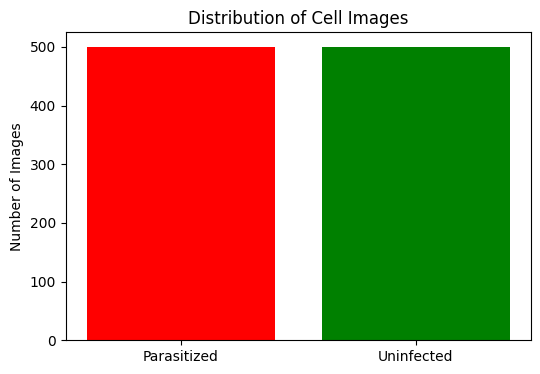

In [11]:
import matplotlib.pyplot as plt

labels = ['Parasitized', 'Uninfected']
counts = [num_infected, num_uninfected]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['red', 'green'])
plt.title('Distribution of Cell Images')
plt.ylabel('Number of Images')
plt.show()

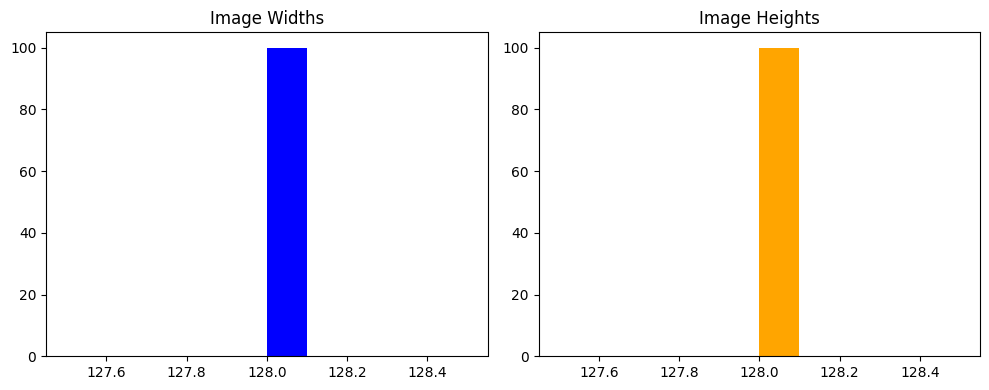

In [13]:
from PIL import Image

image_sizes = []
sample_files = os.listdir(infected_dir)[:100]

for img_name in sample_files:
    img_path = os.path.join(infected_dir, img_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)


widths, heights = zip(*image_sizes)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=10, color='blue')
plt.title("Image Widths")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=10, color='orange')
plt.title("Image Heights")

plt.tight_layout()
plt.show()


In [14]:
!pip install tensorflow



ERROR: You must give at least one requirement to install (see "pip help install")


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


train_dir = '/content/malaria_sample_1000'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


model.save('/content/malaria_cnn_model.h5')
print("Model trained and saved successfully!")


Found 800 images belonging to 1 classes.
Found 200 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8610 - loss: 0.1058 - val_accuracy: 1.0000 - val_loss: 8.9253e-25
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 1.0000 - loss: 7.2872e-20 - val_accuracy: 1.0000 - val_loss: 1.3869e-27
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 3.0425e-22 - val_accuracy: 1.0000 - val_loss: 7.4453e-28
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 1.0000 - loss: 4.7522e-22 - val_accuracy: 1.0000 - val_loss: 1.9151e-28
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 6.0538e-22 - val_accuracy: 1.0000 - val_loss: 7.0217e-28
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 1.2267e-21 - val_accuracy: 1.0000 - val_loss: 7.0222e-28
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 2.4186e-22 - val_accuracy: 1.0000 - val_loss: 7.0221e-28
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 

Model trained and saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>